In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
!pip install tqdm

In [3]:
conv_df = pd.read_csv('ALL_CONVERSATIONS_WRANGLED.csv')
pred_df = pd.read_csv('english_tweetids_and_nn_sentiments.csv')
display(conv_df.head())
pred_df.head()

,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved
0,5,"[(747530773037780992, 31132554), (747526794446...",2,"[747526794446802944, 747530773037780992]","[22873368, 31132554]",['No airlines involved']
1,6,"[(747530681509625860, 417945325), (74745123859...",2,"[747451238598475776, 747530681509625860]","[55904765, 417945325]",['No airlines involved']
2,11,"[(747530531475173376, 597673831), (74752831114...",2,"[747528311144734720, 747530531475173376]","[427951650, 597673831]",['No airlines involved']
3,12,"[(747530509098450944, 1624311463), (7475297117...",2,"[747529711782244352, 747530509098450944]","[1624311463, 1624311463]",['No airlines involved']
4,14,"[(747530348561571840, 154605692), (74752081839...",2,"[747520818398232576, 747530348561571840]","[117754884, 154605692]",['No airlines involved']


,nn_pred,tweet_id
0,1,780682646854787072
1,0,780682655104991232
2,1,780682685761093632
3,1,780682795215642624
4,2,780682812005486592


In [4]:
conv_df['conversation_length'].value_counts()

2     316059
3      72506
4      27504
5       7603
6       3195
7       1011
8        448
9        150
10        76
11        40
12        17
15         6
13         4
16         3
20         2
19         1
14         1
17         1
Name: conversation_length, dtype: int64

In [5]:
#make sentiment dictionary from pred_df
pred_dict = dict(zip(list(pred_df['tweet_id']), list(pred_df['nn_pred'])))

In [6]:
# Get sentiments for conversations
conv_sentiment = []
for tweet_ids in tqdm_notebook(list(conv_df['tweet_ids'])):
    tweet_sent = []
    for tweet_id in eval(tweet_ids):
        try:
            pred = pred_dict[tweet_id]
            tweet_sent.append(pred)
        except KeyError:
            tweet_sent.append(np.nan)
            pass

    # If empty, add NaN value
    #if tweet_sent == []:
    #    tweet_sent = np.nan
    conv_sentiment.append(tweet_sent)       

HBox(children=(IntProgress(value=0, max=428627), HTML(value='')))

In [7]:
# Extract the mean of the collected sentiments
mean_sentiment = []
for sent in tqdm_notebook(conv_sentiment):
    if sent == np.nan:
        mean_sentiment.append(np.nan)
    else:
        mean_sentiment.append(np.mean(sent))

HBox(children=(IntProgress(value=0, max=428627), HTML(value='')))

In [8]:
conv_df['mean_sentiment'] = mean_sentiment
conv_df['sentiments'] = conv_sentiment

In [9]:
conv_df.head()

,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved,mean_sentiment,sentiments
0,5,"[(747530773037780992, 31132554), (747526794446...",2,"[747526794446802944, 747530773037780992]","[22873368, 31132554]",['No airlines involved'],NaN,"[nan, 1]"
1,6,"[(747530681509625860, 417945325), (74745123859...",2,"[747451238598475776, 747530681509625860]","[55904765, 417945325]",['No airlines involved'],0.0,"[0, 0]"
2,11,"[(747530531475173376, 597673831), (74752831114...",2,"[747528311144734720, 747530531475173376]","[427951650, 597673831]",['No airlines involved'],0.5,"[1, 0]"
3,12,"[(747530509098450944, 1624311463), (7475297117...",2,"[747529711782244352, 747530509098450944]","[1624311463, 1624311463]",['No airlines involved'],0.0,"[0, 0]"
4,14,"[(747530348561571840, 154605692), (74752081839...",2,"[747520818398232576, 747530348561571840]","[117754884, 154605692]",['No airlines involved'],0.5,"[1, 0]"


In [10]:
#conv_df.to_csv('convs_with_sentiment.csv', index=False)

## Analysis

In [11]:
df = pd.read_csv('convs_with_sentiment.csv')

In [12]:
df['mean_sentiment'].astype(float, inplace=True).describe()

count    372429.000000
mean          0.542905
std           0.584006
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           2.000000
Name: mean_sentiment, dtype: float64

In [13]:
df.head()

,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved,mean_sentiment,sentiments
0,5,"[(747530773037780992, 31132554), (747526794446...",2,"[747526794446802944, 747530773037780992]","[22873368, 31132554]",['No airlines involved'],NaN,"[nan, 1]"
1,6,"[(747530681509625860, 417945325), (74745123859...",2,"[747451238598475776, 747530681509625860]","[55904765, 417945325]",['No airlines involved'],0.0,"[0, 0]"
2,11,"[(747530531475173376, 597673831), (74752831114...",2,"[747528311144734720, 747530531475173376]","[427951650, 597673831]",['No airlines involved'],0.5,"[1, 0]"
3,12,"[(747530509098450944, 1624311463), (7475297117...",2,"[747529711782244352, 747530509098450944]","[1624311463, 1624311463]",['No airlines involved'],0.0,"[0, 0]"
4,14,"[(747530348561571840, 154605692), (74752081839...",2,"[747520818398232576, 747530348561571840]","[117754884, 154605692]",['No airlines involved'],0.5,"[1, 0]"


In [14]:
# Extract the mean of the collected sentiments
#std_sentiment = []
#for sent in tqdm_notebook(df['sentiments']):
 #   if sent == np.nan:
  #      std_sentiment.append(np.nan)
   # else:
    #    try:
     #       std_sentiment.append(np.std(eval(sent)))
      #  except NameError:
  #          std_sentiment.append(np.nan)
            

#df['std_sentiment'] = std_sentiment

## User sentiment before and after customer support

In [15]:
def get_user_tweets(airline, airline_id):
    frame = df[df['airlines_involved'] == f"['{airline}']"]
    print(f"[{airline}]")
    first_user_tweets = []
    for data in frame[['user_ids', 'sentiments']].values:
        i = 0
        for ids in eval(data[0]):
            if ids != airline_id:
                try:
                    first_user_tweets.append(eval(data[1])[i])
                    break
                except NameError:
                    pass
            i += 1
        
    last_user_tweets = []
    for data in frame[['user_ids', 'sentiments']].values:
        i = 0
        for ids in eval(data[0])[::-1]:
            if ids != airline_id:
                try:
                    last_user_tweets.append(eval(data[1])[::-1][i])
                    break
                except NameError:
                    pass
            i += 1
    return np.mean(first_user_tweets), np.mean(last_user_tweets)

In [16]:
def get_improvement_tweets(airline, airline_id):
    total = 0
    frame = df[df['airlines_involved'] == f"['{airline}']"]
    print(f"[{airline}]")
    for data in frame[['user_ids', 'sentiments']].values:
        i = 0
        for ids in eval(data[0]):
            if ids != airline_id:
                try:
                    if eval(data[1])[i] == 0:
                        total += 1
                        break
                except NameError:
                    pass
            i += 1
        total += 1
    
    improvements = 0
    for data in frame[['user_ids', 'sentiments']].values:
        i = 0
        for ids in eval(data[0])[::-1]:
            if ids != airline_id:
                try:
                    if eval(data[1])[::-1][i] > 0:
                        improvements += 1
                        break
                except NameError:
                    pass
            i += 1
    return improvements / total * 100

In [17]:
airline_names = ["KLM", "AirFrance", "British_Airways", "AmericanAir", "Lufthansa", 
"AirBerlin", "AirBerlin assist", "easyJet", "RyanAir", "SingaporeAir", 
"Qantas", "EtihadAirways", "VirginAtlantic"]
airline_ids = ["56377143", "106062176", "18332190", "22536055", 
"124476322", "26223583", "2182373406", "38676903", 
"1542862735", "253340062", "218730857", "45621423", "20626359"]

improvement = []
for airline, airline_id in zip(airline_names, airline_ids):
    improv = get_improvement_tweets(airline, airline_id)
    improvement.append(improv)
    print(f'Improvement in convs that start negative: {round(improv, 2)}%')

[KLM]
Improvement in convs that start negative: 25.17%
[AirFrance]
Improvement in convs that start negative: 37.11%
[British_Airways]
Improvement in convs that start negative: 34.32%
[AmericanAir]
Improvement in convs that start negative: 29.45%
[Lufthansa]
Improvement in convs that start negative: 32.22%
[AirBerlin]
Improvement in convs that start negative: 22.52%
[AirBerlin assist]
Improvement in convs that start negative: 26.66%
[easyJet]
Improvement in convs that start negative: 40.53%
[RyanAir]
Improvement in convs that start negative: 48.83%
[SingaporeAir]
Improvement in convs that start negative: 52.67%
[Qantas]
Improvement in convs that start negative: 46.95%
[EtihadAirways]
Improvement in convs that start negative: 50.65%
[VirginAtlantic]
Improvement in convs that start negative: 38.4%


In [18]:
get_user_tweets('KLM', "56377143")

[KLM]


(0.5507914245642156, 0.734472049689441)

In [19]:
airline_names = ["KLM", "AirFrance", "British_Airways", "AmericanAir", "Lufthansa", 
"AirBerlin", "AirBerlin assist", "easyJet", "RyanAir", "SingaporeAir", 
"Qantas", "EtihadAirways", "VirginAtlantic"]
airline_ids = ["56377143", "106062176", "18332190", "22536055", 
"124476322", "26223583", "2182373406", "38676903", 
"1542862735", "253340062", "218730857", "45621423", "20626359"]

sent_before = []
sent_after = []
for airline, airline_id in zip(airline_names, airline_ids):
    sents = get_user_tweets(airline, airline_id)
    sent_before.append(sents[0])
    sent_after.append(sents[1])

[KLM]
[AirFrance]
[British_Airways]
[AmericanAir]
[Lufthansa]
[AirBerlin]
[AirBerlin assist]
[easyJet]
[RyanAir]
[SingaporeAir]
[Qantas]
[EtihadAirways]
[VirginAtlantic]


In [20]:
increase = np.array(sent_after)-np.array(sent_before)
perc_increase = (np.array(sent_after) - np.array(sent_before)) / np.array(sent_before) * 100


before_after = pd.DataFrame({'airline' : airline_names,
                             'sentiment_before' : sent_before,
                             'sentiment_after' : sent_after,
                             'increase' : increase.round(2),
                             'percentage_increase' : perc_increase.round(2),
                             'negative_improved' : improvement})
before_after = before_after.set_index('airline')
before_after

,increase,negative_improved,percentage_increase,sentiment_after,sentiment_before
airline,,,,,
KLM,0.18,25.169404,33.35,0.734472,0.550791
AirFrance,0.31,37.111390,57.91,0.834880,0.528704
British_Airways,0.22,34.318364,50.23,0.651680,0.433784
AmericanAir,0.28,29.447818,72.15,0.676917,0.393214
Lufthansa,0.15,32.217837,31.73,0.617401,0.468688
AirBerlin,0.24,22.522220,57.06,0.666018,0.424051
AirBerlin assist,0.23,26.658814,68.26,0.574305,0.341323
easyJet,0.31,40.532211,75.27,0.724343,0.413268
RyanAir,0.30,48.829466,56.16,0.828467,0.530522


Text(0,0.5,'Airline')

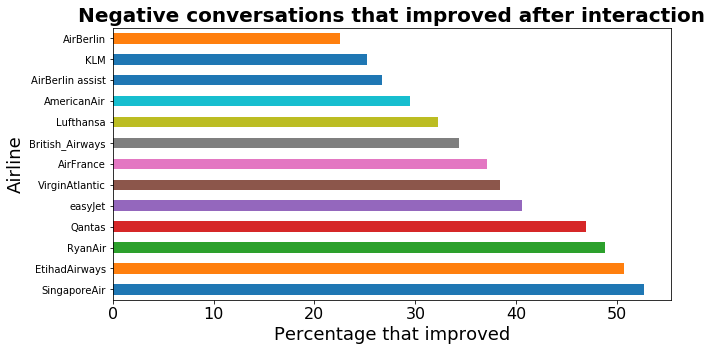

In [21]:
#selection = before_after.set_index('airline').filter(['SingaporeAir', 'KLM', 'British_Airways', 'AirBerlin'], axis=0)
before_after.sort_values(by='negative_improved', ascending=False)['negative_improved'].plot(kind='barh', 
                                                                                        figsize=(10,5))
plt.title('Negative conversations that improved after interaction', 
          weight='bold', fontsize=20)
plt.xlabel('Percentage that improved', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Airline', fontsize=18)
#plt.savefig('conv_perc_improvement_barh', dpi=300)

Text(0,0.5,'Airline')

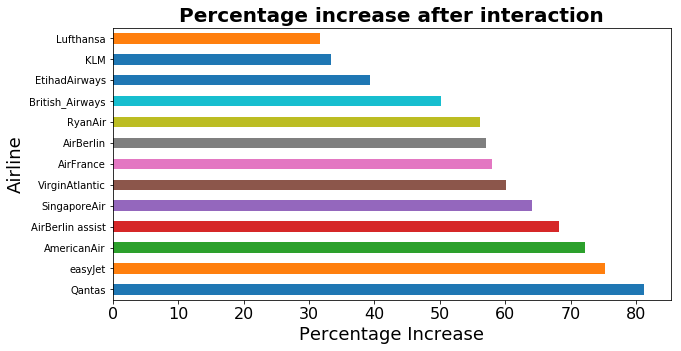

In [22]:
#selection = before_after.set_index('airline').filter(['Qantas', 'KLM', 'British_Airways', 'Lufthansa'], axis=0)

before_after.sort_values(by='percentage_increase', ascending=False)['percentage_increase'].plot(kind='barh', 
                                                                                        figsize=(10,5), rot=0)
plt.title('Percentage increase after interaction', 
          weight='bold', fontsize=20)
plt.xlabel('Percentage Increase', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Airline', fontsize=18)
#plt.savefig('percentage_increase_sentiment_barh', dpi=300)

Text(0,0.5,'Airline')

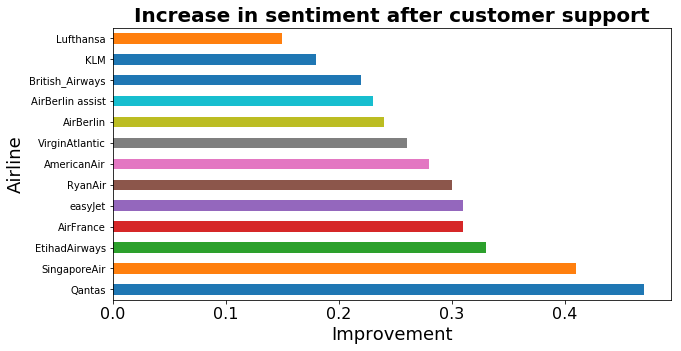

In [23]:
#selection2 = before_after.set_index('airline').filter(['SingaporeAir', 'KLM', 'British_Airways', 'AirBerlin'], axis=0)

before_after.sort_values(by='increase', ascending=False)['increase'].plot(kind='barh', 
                                                                              figsize=(10,5), rot=0)
plt.title('Increase in sentiment after customer support', 
          weight='bold', fontsize=20)
plt.xlabel('Improvement', fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('Airline', fontsize=18)
#plt.savefig('sentiment_increase_per_airline_barh.png', dpi=300)

IndexError: index 5 is out of bounds for axis 0 with size 5

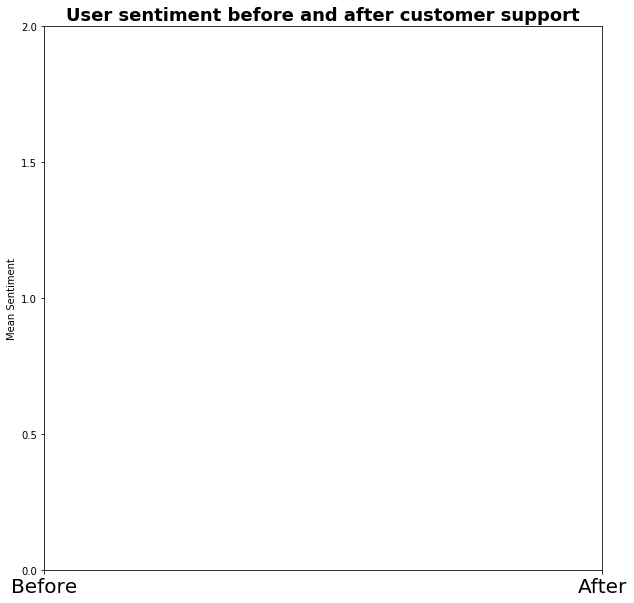

In [24]:
#selection3 = before_after.set_index('airline').filter(['SingaporeAir', 'KLM', 'British_Airways', 'AirBerlin'], axis=0)

plt.figure(figsize=(10,10))
plt.title('User sentiment before and after customer support', weight='bold', fontsize=18)
plt.xticks([0,1], ('Before', 'After'), fontsize=20)
plt.ylim(0,2)
plt.yticks([0,0.5,1,1.5,2])
plt.ylabel('Mean Sentiment')
for row in before_after.values:
    plt.plot([row[5],row[4]])
plt.legend(airline_names);

## Check conversations

In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('full_conversation_database.db')
text_df = pd.read_sql("SELECT id_str, text FROM tweets", conn)

In [ ]:
text_df.head()

In [ ]:
conv = df.iloc[20288]['tweet_ids']
for tweet in eval(conv):
    print(str(text_df[text_df['id_str'] == str(tweet)]['text'].item()))

# Conversation 20288


# Positive - Thank you, You're welcome, :)

# Neutral - Willing, availability, business class, markets, prescription medications
# Short tweets, unemotional tweets, no indication of biased words

# Negative - Help, Customs, site down, won't load, issues, resolve
# (too) hard, :(, disappointed, sorry, bad, limited, worthless,
# impossible, sucks, chasing, away, zeroed, 0, finally, cost, uncertainty, frustration, ruined, missing, afraid,
# resolved, damage, negative, regret, inconvenience, 

In [ ]:
#for tweet in text_df['text']:
#    if 'XOXO' in tweet:
#        print(tweet)